### In this demonstration, we will see how the distribution of sample means converges to a normal distribution as n approaches infinity.
#### The original CLT states that the sum of i.i.d. RV's tends towards a normal distribution.
##### By simple extension, if we divide this sum by the sample size, we instead get a normal distribution of sample means.
##### By further extension, if we normalize our RV's, we instead get the standard normal equation.
#### We will first generate samples from Poisson, Geometric, and Exponential distributions, and then we will see the distribution defined by the sample means from each of these non-normal distributions.

In [168]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
plt.style.use('alex')

In [244]:
sample_size=100
N = 1000
N_samples = range(N)

binomial_means = [np.random.binomial(10,.5,size=sample_size).mean() for sample in N_samples];
poisson_means = [np.random.poisson(lam=5,size=sample_size).mean() for sample in N_samples];
exp_means = [np.random.exponential(scale=5, size=sample_size).mean() for sample in N_samples];
uniform_means = [np.random.uniform(low=0,high=10,size=sample_size).mean() for sample in N_samples];


In [421]:
def UniformSampleMeanDist_CLT(sample_size, N_samples, ax_index, mean, var):
    
    
    '''Generate a set of sample means from sample randomly drawn from given distribution (i.e. uniform, exponential, etc.)
    Then plot the distribution of sample means'''
    
    sample_means = [np.random.uniform(low=0,high=1,size=sample_size).mean() for sample in range(N_samples)];
    
    ax = f.add_subplot(3,2, ax_index)
    plt.hist(sample_means, 100, normed=True, label = "Sample Mean; Sample Size: %d "%(sample_size));
    
    
    '''Overlay the normal distribution according to the Central Limit Theorem'''
    x_space = np.linspace(0,1,128)
    mean = mean;
    CLT_variance = var/sample_size;
    sigma = np.sqrt(CLT_variance);
    
    x = np.linspace(mean - 3*np.sqrt(var), mean + 3*np.sqrt(var), 100)
    plt.plot(x_space,mlab.normpdf(x_space,mean,sigma), label = 'CLT Normal Distribution')
    legend = plt.legend(loc='upper left')
    legend.get_frame().set_alpha(0.1)
    
    for label in legend.get_texts():
        label.set_fontsize('large')
    

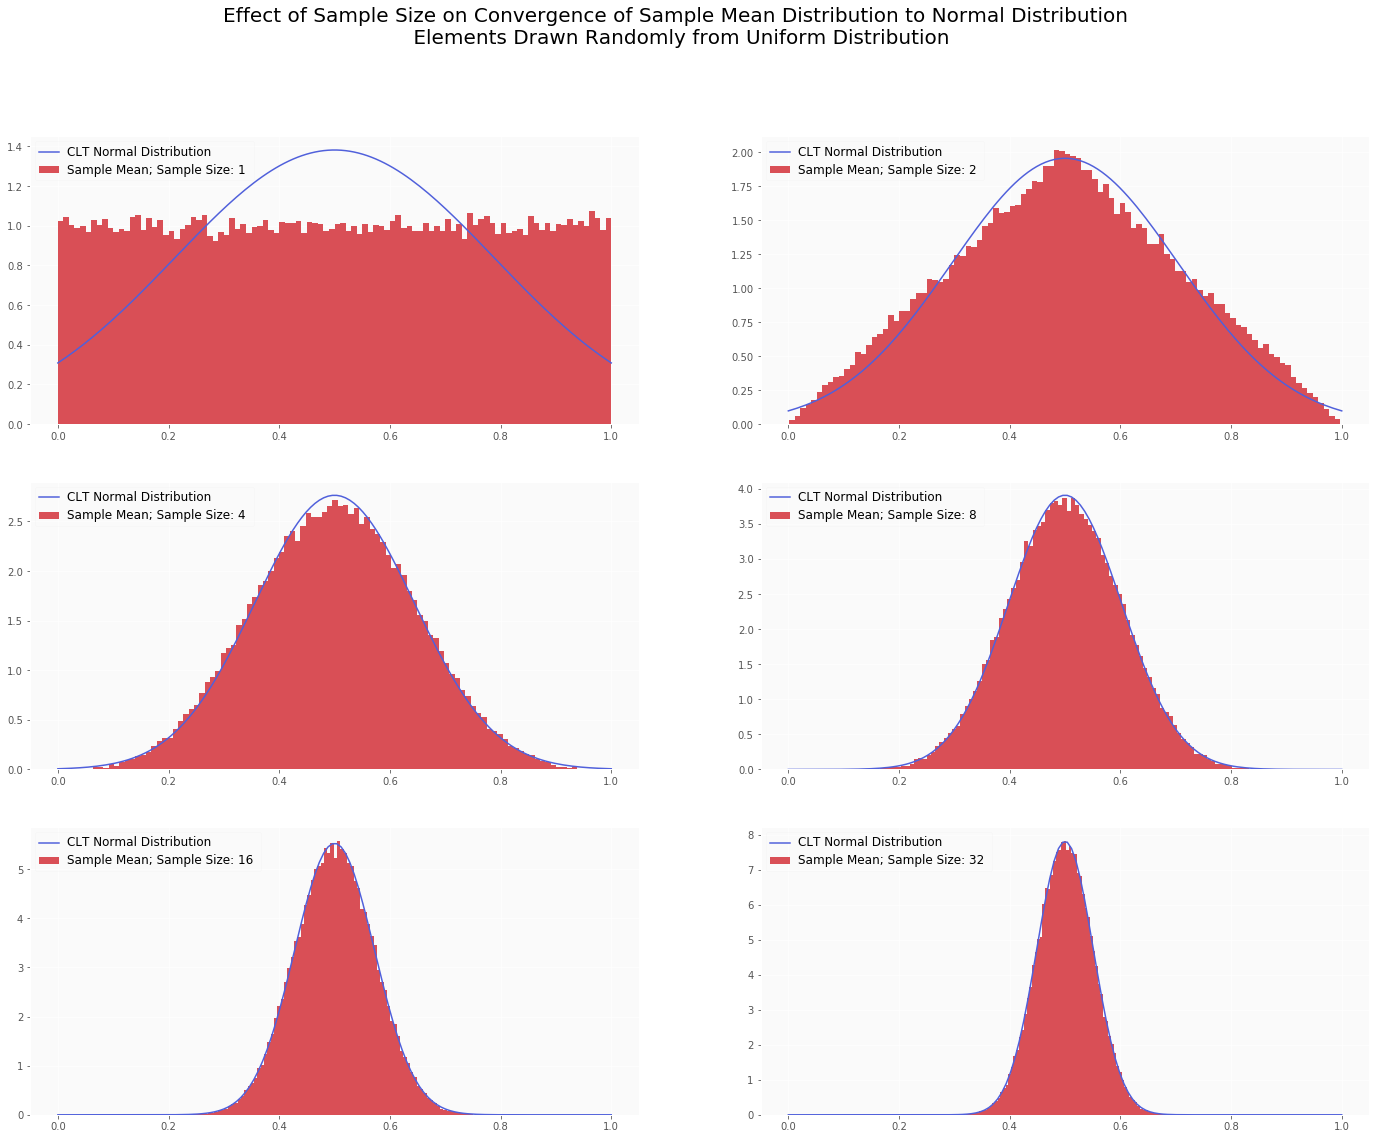

In [422]:
f = plt.figure(figsize=(24,18));

demo_sample_sizes = [1,2,4,8,16,32]

for i in range(len(demo_sample_sizes)):
    UniformSampleMeanDist_CLT(sample_size = demo_sample_sizes[i],
                           N_samples = 100000,
                           ax_index = i+1,
                           mean = 0.5,
                           var = 1/12)

plt.suptitle('Effect of Sample Size on Convergence of Sample Mean Distribution to Normal Distribution \n Elements Drawn Randomly from Uniform Distribution', fontsize='20')
plt.show()


In [424]:
def Exp_SampleMeanDist_CLT(sample_size, N_samples, ax_index, mean, var):
    
    
    '''Generate a set of sample means from sample randomly drawn from given distribution (i.e. uniform, exponential, etc.)
    Then plot the distribution of sample means'''
    
    sample_means = [np.random.exponential(scale=0.5,size=sample_size).mean() for sample in range(N_samples)];
    
    ax = f.add_subplot(3,2, ax_index)
    plt.hist(sample_means, 100, normed=True, label = "Sample Mean; Sample Size: %d "%(sample_size));
    
    
    '''Overlay the normal distribution according to the Central Limit Theorem'''
    x_space = np.linspace(-3,3,256)
    mean = mean;
    CLT_variance = var/sample_size;
    sigma = np.sqrt(CLT_variance);
    
    plt.plot(x_space,mlab.normpdf(x_space,mean,sigma), label = 'CLT Normal Distribution')
    legend = plt.legend(loc='upper right')
    legend.get_frame().set_alpha(0.1)
    plt.xlim(0,2)
    
    for label in legend.get_texts():
        label.set_fontsize('15')
    

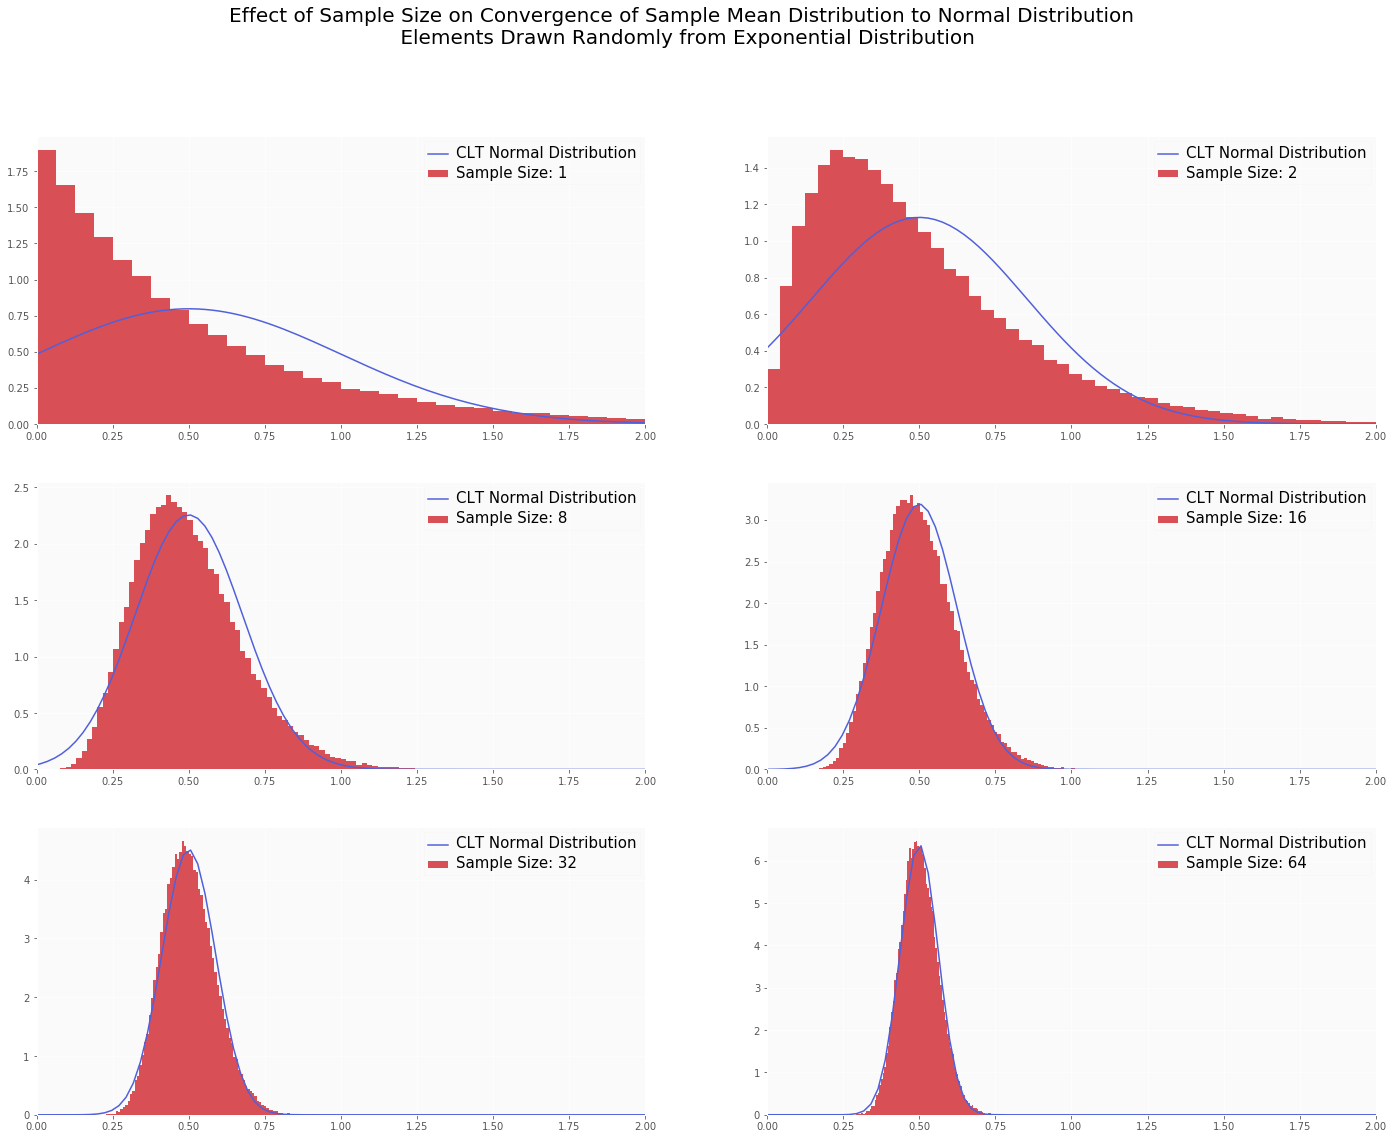

In [423]:
f = plt.figure(figsize=(24,18));

demo_sample_sizes = [1,2,8,16,32,64]

for i in range(len(demo_sample_sizes)):
    Exp_SampleMeanDist_CLT(sample_size = demo_sample_sizes[i],
                           N_samples = 100000,
                           ax_index = i+1,
                           mean = 0.5,
                           var = 0.25)
    
plt.suptitle('Effect of Sample Size on Convergence of Sample Mean Distribution to Normal Distribution \n Elements Drawn Randomly from Exponential Distribution', fontsize='20')
plt.show()

In [437]:
def Poisson_SampleMeanDist_CLT(sample_size, N_samples, ax_index, mean, var):
    
    
    '''Generate a set of sample means from sample randomly drawn from given distribution (i.e. uniform, exponential, etc.)
    Then plot the distribution of sample means'''
    
    sample_means = [np.random.poisson(lam=2,size=sample_size).mean() for sample in range(N_samples)];
    
    ax = f.add_subplot(3,2, ax_index)
    plt.hist(sample_means, 50, normed=True, label = "Sample Size: %d "%(sample_size));
    
    
    '''Overlay the normal distribution according to the Central Limit Theorem'''
    x_space = np.linspace(0,10,256)
    mean = mean;
    CLT_variance = var/sample_size;
    sigma = np.sqrt(CLT_variance);
    
    plt.plot(x_space,mlab.normpdf(x_space,mean,sigma), label = 'CLT Normal Distribution')
    legend = plt.legend(loc='upper right')
    legend.get_frame().set_alpha(0.1)
    plt.xlim(0,5)
    
    for label in legend.get_texts():
        label.set_fontsize('15')
    

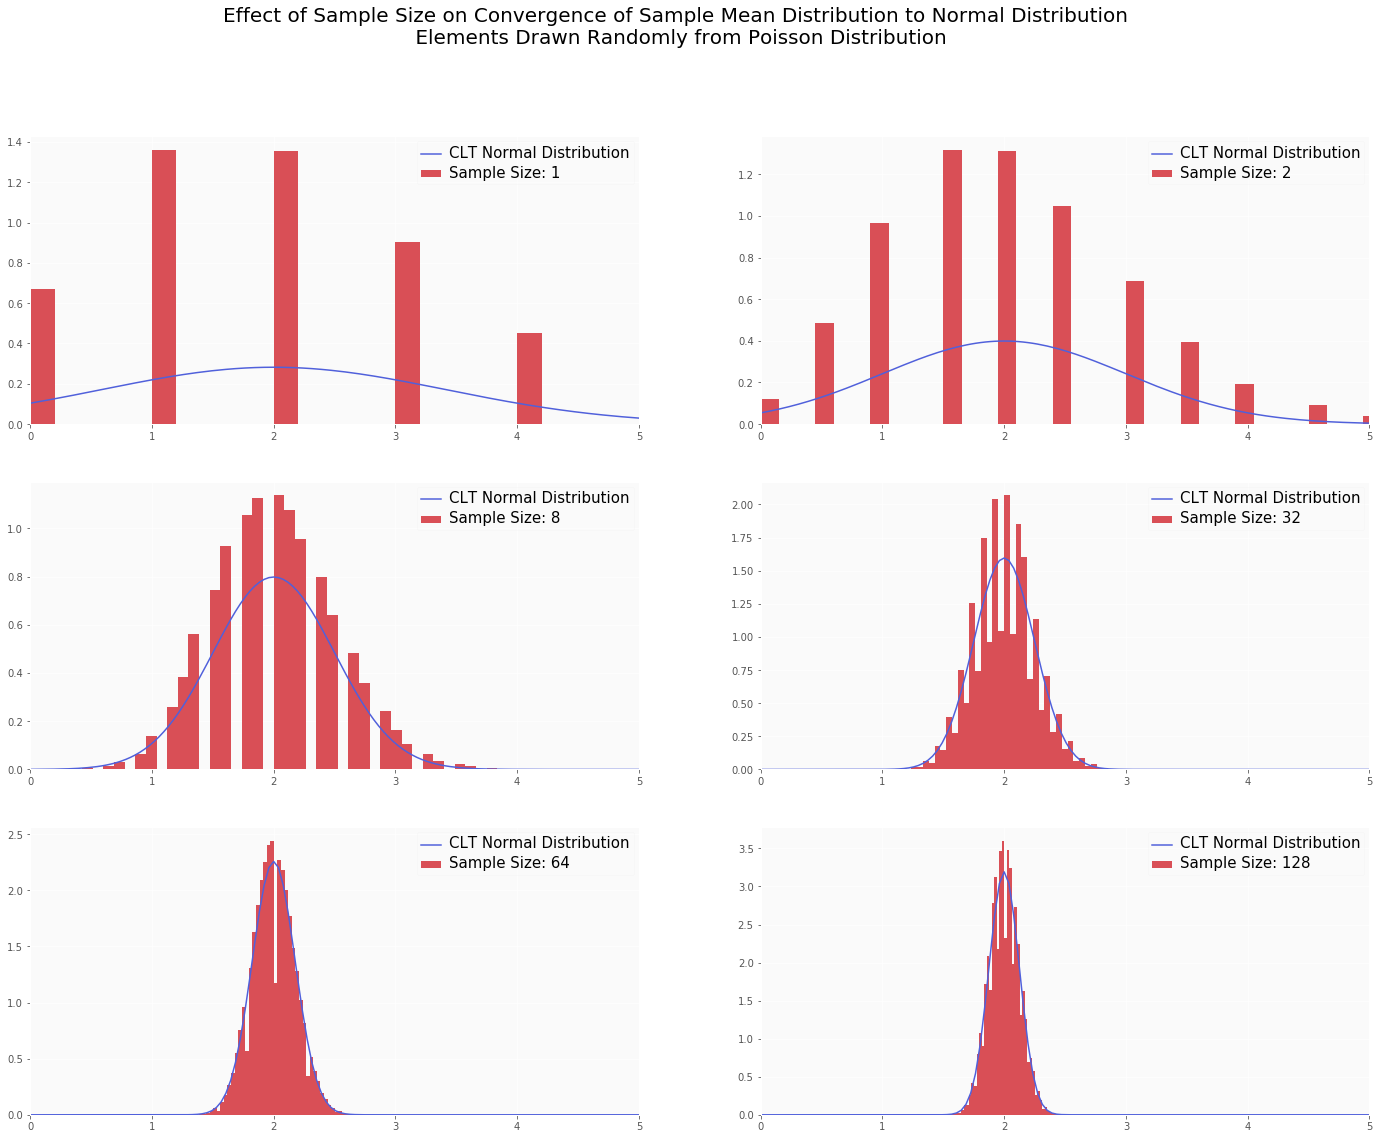

In [439]:
f = plt.figure(figsize=(24,18));

demo_sample_sizes = [1,2,8,32,64,128]

for i in range(len(demo_sample_sizes)):
    Poisson_SampleMeanDist_CLT(sample_size = demo_sample_sizes[i],
                           N_samples = 100000,
                           ax_index = i+1,
                           mean = 2,
                           var = 2)
    
plt.suptitle('Effect of Sample Size on Convergence of Sample Mean Distribution to Normal Distribution \n Elements Drawn Randomly from Poisson Distribution', fontsize='20')
plt.show()